In [1]:
# Repository locations
ATM_DIR = "/epyc/projects/atm/atm/"
ATM_DATA_DIR = "/epyc/projects/atm/atm_data/"

In [2]:
import os
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set(font_scale=0.8, 
        context="paper", 
        style="ticks", 
        rc={"axes.linewidth": 0.8})
sns.set_palette("viridis")

%matplotlib inline

import sys
sys.path.append(ATM_DIR)

from atm.obs import WISE
from atm.models import NEATM
from atm.functions import calcQ
from atm.functions import calcFluxLambdaAtObsWithSunlight
from atm.analysis import calcColors
from atm.analysis import mergeResultsWithNEOWISE
from atm.analysis import crossmatchNEOWISE
from atm.plotting import plotHist

In [3]:
DPI = 300
SAVE_DIR = "../plots/"
FORMAT = "png"

SAVE_FIGS = False

In [4]:
SIGMA = 0.10
RUN_DIR = os.path.join(ATM_DATA_DIR, "paper1/runs/sigma{}".format(int(SIGMA * 100)))
RUN_NAME = "run1"

In [5]:
con = sql.connect(os.path.join(ATM_DATA_DIR, "paper1/sample.db"))

neowise_v1 = pd.read_sql("""SELECT * FROM neowise_v1""", con)
observations = pd.read_sql("""SELECT * FROM observations""", con)

In [6]:
neowise_v1["FIT_CODE"].value_counts()

DV--    87446
DVB-    69484
DVBI     4600
DV-I     2878
D---     1061
D-B-      385
-VB-        9
D-BI        1
DVB         1
Name: FIT_CODE, dtype: int64

In [7]:
crossmatchNEOWISE(neowise_v1, observations[observations["keep"] == 1])

Crossmatched 7104 unique designations from observations with NEOWISE table.


In [8]:
results_database = os.path.join(RUN_DIR, "atm_results_{}.db".format(RUN_NAME))
merged_results, pp_dfs = mergeResultsWithNEOWISE(os.path.join(ATM_DATA_DIR, "paper1/sample.db"), 
                                                 results_database, 
                                                 minObs=3, 
                                                 fitCodes=["DVBI"])

con = sql.connect(results_database)
observed_stats = pd.read_sql("""SELECT * FROM observed_stats""", con)
model_stats = pd.read_sql("""SELECT * FROM model_stats""", con)

There are 165865 fits for 140493 unique objects in the 2016 NEOWISE PDS table.
Selecting only fits with at least 3 observations in each band.
Selecting only fits with fit code(s): DVBI.
There are 3102 fits for 2871 unique objects.
3045 fits have been matched with an object in observations.
Sorting by number of observations and keeping the fits using the most observations...
Merging NEOWISE results with post-processed tables...

2807 fits have been found for 2807 unique objects in observations.
Done.



In [9]:
neowise_v1[~neowise_v1["matched_designation"].isna()]["FIT_CODE"].value_counts()

DVB-    4033
DVBI    3796
DV--    3612
DV-I    1643
-VB-       6
D-B-       4
Name: FIT_CODE, dtype: int64

In [10]:
matched_fits = len(neowise_v1[(~neowise_v1["matched_designation"].isna()) & (neowise_v1["N_W1"] == 0)])
all_fits = len(neowise_v1[neowise_v1["N_W1"] == 0])
only_fits = len(neowise_v1[(neowise_v1["N_W1"] != 0) 
                         & (neowise_v1["N_W2"] == 0)
                         & (neowise_v1["N_W3"] == 0)
                         & (neowise_v1["N_W4"] == 0)])
print("Matched NEOWISE fits with no W1 observations: {}".format(matched_fits))
print("NEOWISE fits with no W1 observations: {} ({:.2f} %)".format(all_fits, all_fits / len(neowise_v1) * 100.0))
print("NEOWISE fits with only W1 observations: {} ({:.2f} %)".format(only_fits, only_fits / len(neowise_v1) * 100.0))

Matched NEOWISE fits with no W1 observations: 5298
NEOWISE fits with no W1 observations: 154259 (93.00 %)
NEOWISE fits with only W1 observations: 13 (0.01 %)


In [11]:
matched_fits = len(neowise_v1[(~neowise_v1["matched_designation"].isna()) & (neowise_v1["N_W2"] == 0)])
all_fits = len(neowise_v1[neowise_v1["N_W2"] == 0])
only_fits = len(neowise_v1[(neowise_v1["N_W1"] == 0) 
                         & (neowise_v1["N_W2"] != 0)
                         & (neowise_v1["N_W3"] == 0)
                         & (neowise_v1["N_W4"] == 0)])
print("Matched NEOWISE fits with no W2 observations: {}".format(matched_fits))
print("NEOWISE fits with no W2 observations: {} ({:.2f} %)".format(all_fits, all_fits / len(neowise_v1) * 100.0))
print("NEOWISE fits with only W2 observations: {} ({:.2f} %)".format(only_fits, only_fits / len(neowise_v1) * 100.0))

Matched NEOWISE fits with no W2 observations: 2399
NEOWISE fits with no W2 observations: 138960 (83.78 %)
NEOWISE fits with only W2 observations: 9076 (5.47 %)


In [12]:
matched_fits = len(neowise_v1[(~neowise_v1["matched_designation"].isna()) & (neowise_v1["N_W3"] == 0)])
all_fits = len(neowise_v1[neowise_v1["N_W3"] == 0])
only_fits = len(neowise_v1[(neowise_v1["N_W1"] == 0) 
                         & (neowise_v1["N_W2"] == 0)
                         & (neowise_v1["N_W3"] != 0)
                         & (neowise_v1["N_W4"] == 0)])
print("Matched NEOWISE fits with no W3 observations: {}".format(matched_fits))
print("NEOWISE fits with no W3 observations: {} ({:.2f} %)".format(all_fits, all_fits / len(neowise_v1) * 100.0))
print("NEOWISE fits with only W3 observations: {} ({:.2f} %)".format(only_fits, only_fits / len(neowise_v1) * 100.0))

Matched NEOWISE fits with no W3 observations: 4985
NEOWISE fits with no W3 observations: 15540 (9.37 %)
NEOWISE fits with only W3 observations: 74856 (45.13 %)


In [13]:
matched_fits = len(neowise_v1[(~neowise_v1["matched_designation"].isna()) & (neowise_v1["N_W4"] == 0)])
all_fits = len(neowise_v1[neowise_v1["N_W4"] == 0])
only_fits = len(neowise_v1[(neowise_v1["N_W1"] == 0) 
                         & (neowise_v1["N_W2"] == 0)
                         & (neowise_v1["N_W3"] == 0)
                         & (neowise_v1["N_W4"] != 0)])
print("Matched NEOWISE fits with no W1 observations: {}".format(matched_fits))
print("NEOWISE fits with no W4 observations: {} ({:.2f} %)".format(all_fits, all_fits / len(neowise_v1) * 100.0))
print("NEOWISE fits with only W4 observations: {} ({:.2f} %)".format(only_fits, only_fits / len(neowise_v1) * 100.0))

Matched NEOWISE fits with no W1 observations: 5403
NEOWISE fits with no W4 observations: 92313 (55.66 %)
NEOWISE fits with only W4 observations: 76 (0.05 %)


In [14]:
len(neowise_v1[(~neowise_v1["matched_designation"].isna()) 
               & (neowise_v1["N_W1"] > 0) 
               & (neowise_v1["N_W2"] > 0) 
               & (neowise_v1["N_W3"] > 0)
               & (neowise_v1["N_W4"] > 0)])

3192

In [15]:
neowise_v1[(~neowise_v1["matched_designation"].isna()) 
           & (neowise_v1["N_W1"] > 0) 
           & (neowise_v1["N_W2"] > 0) 
           & (neowise_v1["N_W3"] > 0) 
           & (neowise_v1["N_W4"] > 0)]["matched_designation"].nunique()

2961

Filtered results: 2807


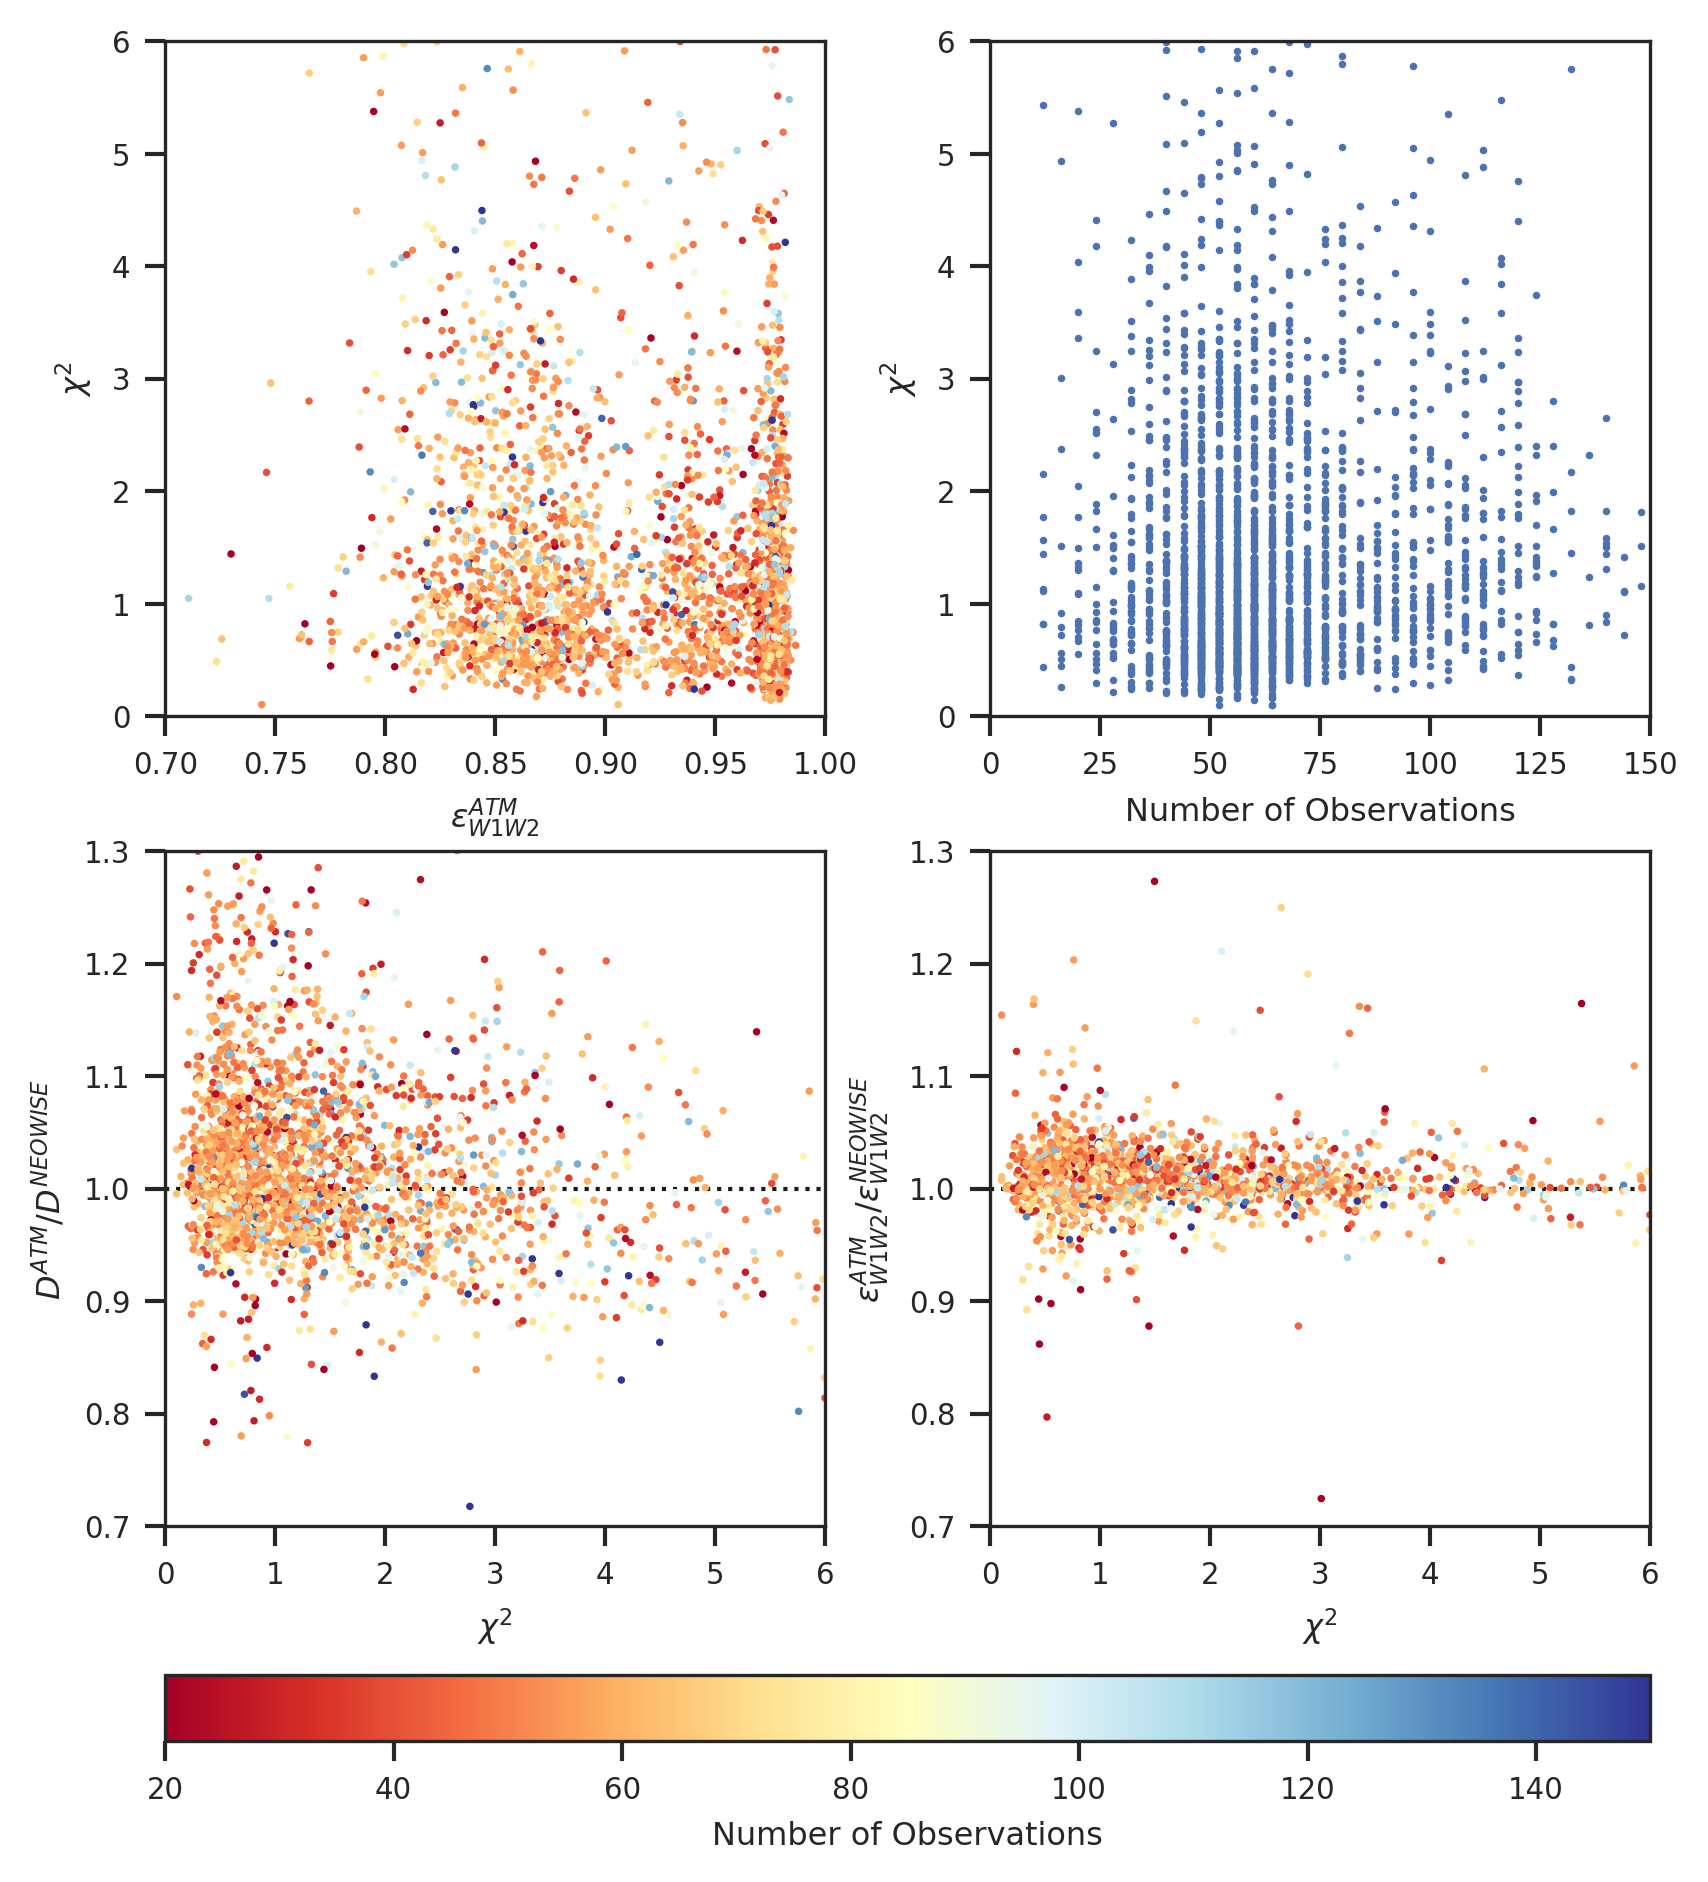

In [16]:
merged_results["eps_W1W2_NEOWISE"] = 1 - merged_results["IR_ALBEDO"] * calcQ(merged_results["SLOPE_PARAM"])

filtered_results = merged_results
print("Filtered results: {}".format(len(filtered_results)))

scatterKwargs = {
    "cmap" : "RdYlBu",
    "vmin" : 20,
    "vmax" : 150,
    "s": 1,
    "c": filtered_results["num_obs"].values
}

fig, ax = plt.subplots(2, 2, dpi=DPI, figsize=(5.5, 5.5))
fig.subplots_adjust(
        # the left side of the subplots of the figure
        left=0.05,  
        # the right side of the subplots of the figure
        right=0.95,
        # the bottom of the subplots of the figure
        bottom=0.05,
        # the top of the subplots of the figure
        top=0.95,
        # the amount of width reserved for space between subplots,
        # expressed as a fraction of the average axis width
        wspace=0.25,   
        # the amount of height reserved for space between subplots,
        # expressed as a fraction of the average axis height
        hspace=0.2)   
cm = ax[0,0].scatter(filtered_results["eps_W1W2_median"].values, 
                     filtered_results["reduced_chi2"].values,
                     **scatterKwargs)
ax[0,0].set_xlabel("$\epsilon_{W1W2}^{ATM}$")
ax[0,0].set_ylabel("$\chi^2$")
ax[0,0].set_ylim(0, 6)
ax[0,0].set_xlim(0.70, 1.0)

cm = ax[0,1].scatter(filtered_results["num_obs"].values, 
                     filtered_results["reduced_chi2"].values,
                     s=1,
                     c="b")
ax[0,1].set_xlabel("Number of Observations")
ax[0,1].set_ylabel("$\chi^2$")
ax[0,1].set_xlim(0, 150)
ax[0,1].set_ylim(0, 6)

cm = ax[1,0].scatter(filtered_results["reduced_chi2"].values, 
                     10**filtered_results["logD_median"].values / (filtered_results["DIAMETER"].values * 1000.), 
                     **scatterKwargs)
ax[1,0].hlines([1], 0, 6, linestyle=":", lw=1, color="k", zorder=0)
ax[1,0].set_xlabel("$\chi^2$")
ax[1,0].set_ylabel("$D^{ATM}/D^{NEOWISE}$")
ax[1,0].set_xlim(0, 6)
ax[1,0].set_ylim(0.7, 1.3)

cm = ax[1,1].scatter(filtered_results["reduced_chi2"].values, 
                     filtered_results["eps_W1W2_median"].values / (filtered_results["eps_W1W2_NEOWISE"].values), 
                     **scatterKwargs)
ax[1,1].hlines([1], 0, 6, linestyle=":", lw=1, color="k", zorder=0)
ax[1,1].set_xlabel("$\chi^2$")
ax[1,1].set_ylabel("$\epsilon_{W1W2}^{ATM}/\epsilon_{W1W2}^{NEOWISE}$")
ax[1,1].set_xlim(0, 6)
ax[1,1].set_ylim(0.7, 1.3)

cbar_ax = fig.add_axes([0.05, -0.08, 0.90, 0.04])
fig.colorbar(cm, 
             cax=cbar_ax, 
             label=r"Number of Observations", 
             orientation="horizontal")
if SAVE_FIGS is True:
    fig.savefig(os.path.join(SAVE_DIR, "chi2_num_obs.{}".format(FORMAT)),
            bbox_inches='tight')

Filtered results: 2807
10 values are outside the defined minimum and maximum.
70 values are outside the defined minimum and maximum.
Statistics will be calculated between 0.0 and 3.0
15 values are outside the defined minimum and maximum.
22 values are outside the defined minimum and maximum.
70 values are outside the defined minimum and maximum.
Statistics will be calculated between 0.0 and 3.0


/epyc/projects/atm/atm/atm/plotting/histograms.py:46: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(xValues, bins=np.linspace(xRange[0], xRange[1], bins), **histKwargs)
/epyc/projects/atm/atm/atm/plotting/histograms.py:46: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(xValues, bins=np.linspace(xRange[0], xRange[1], bins), **histKwargs)
/epyc/projects/atm/atm/atm/plotting/histograms.py:46: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(xValues, bins=np.linspace(xRange[0], xRange[1], bins), **histKwargs)
/epyc/projects/atm/atm/atm/plotting/histograms.py:46: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(x

4 values are outside the defined minimum and maximum.


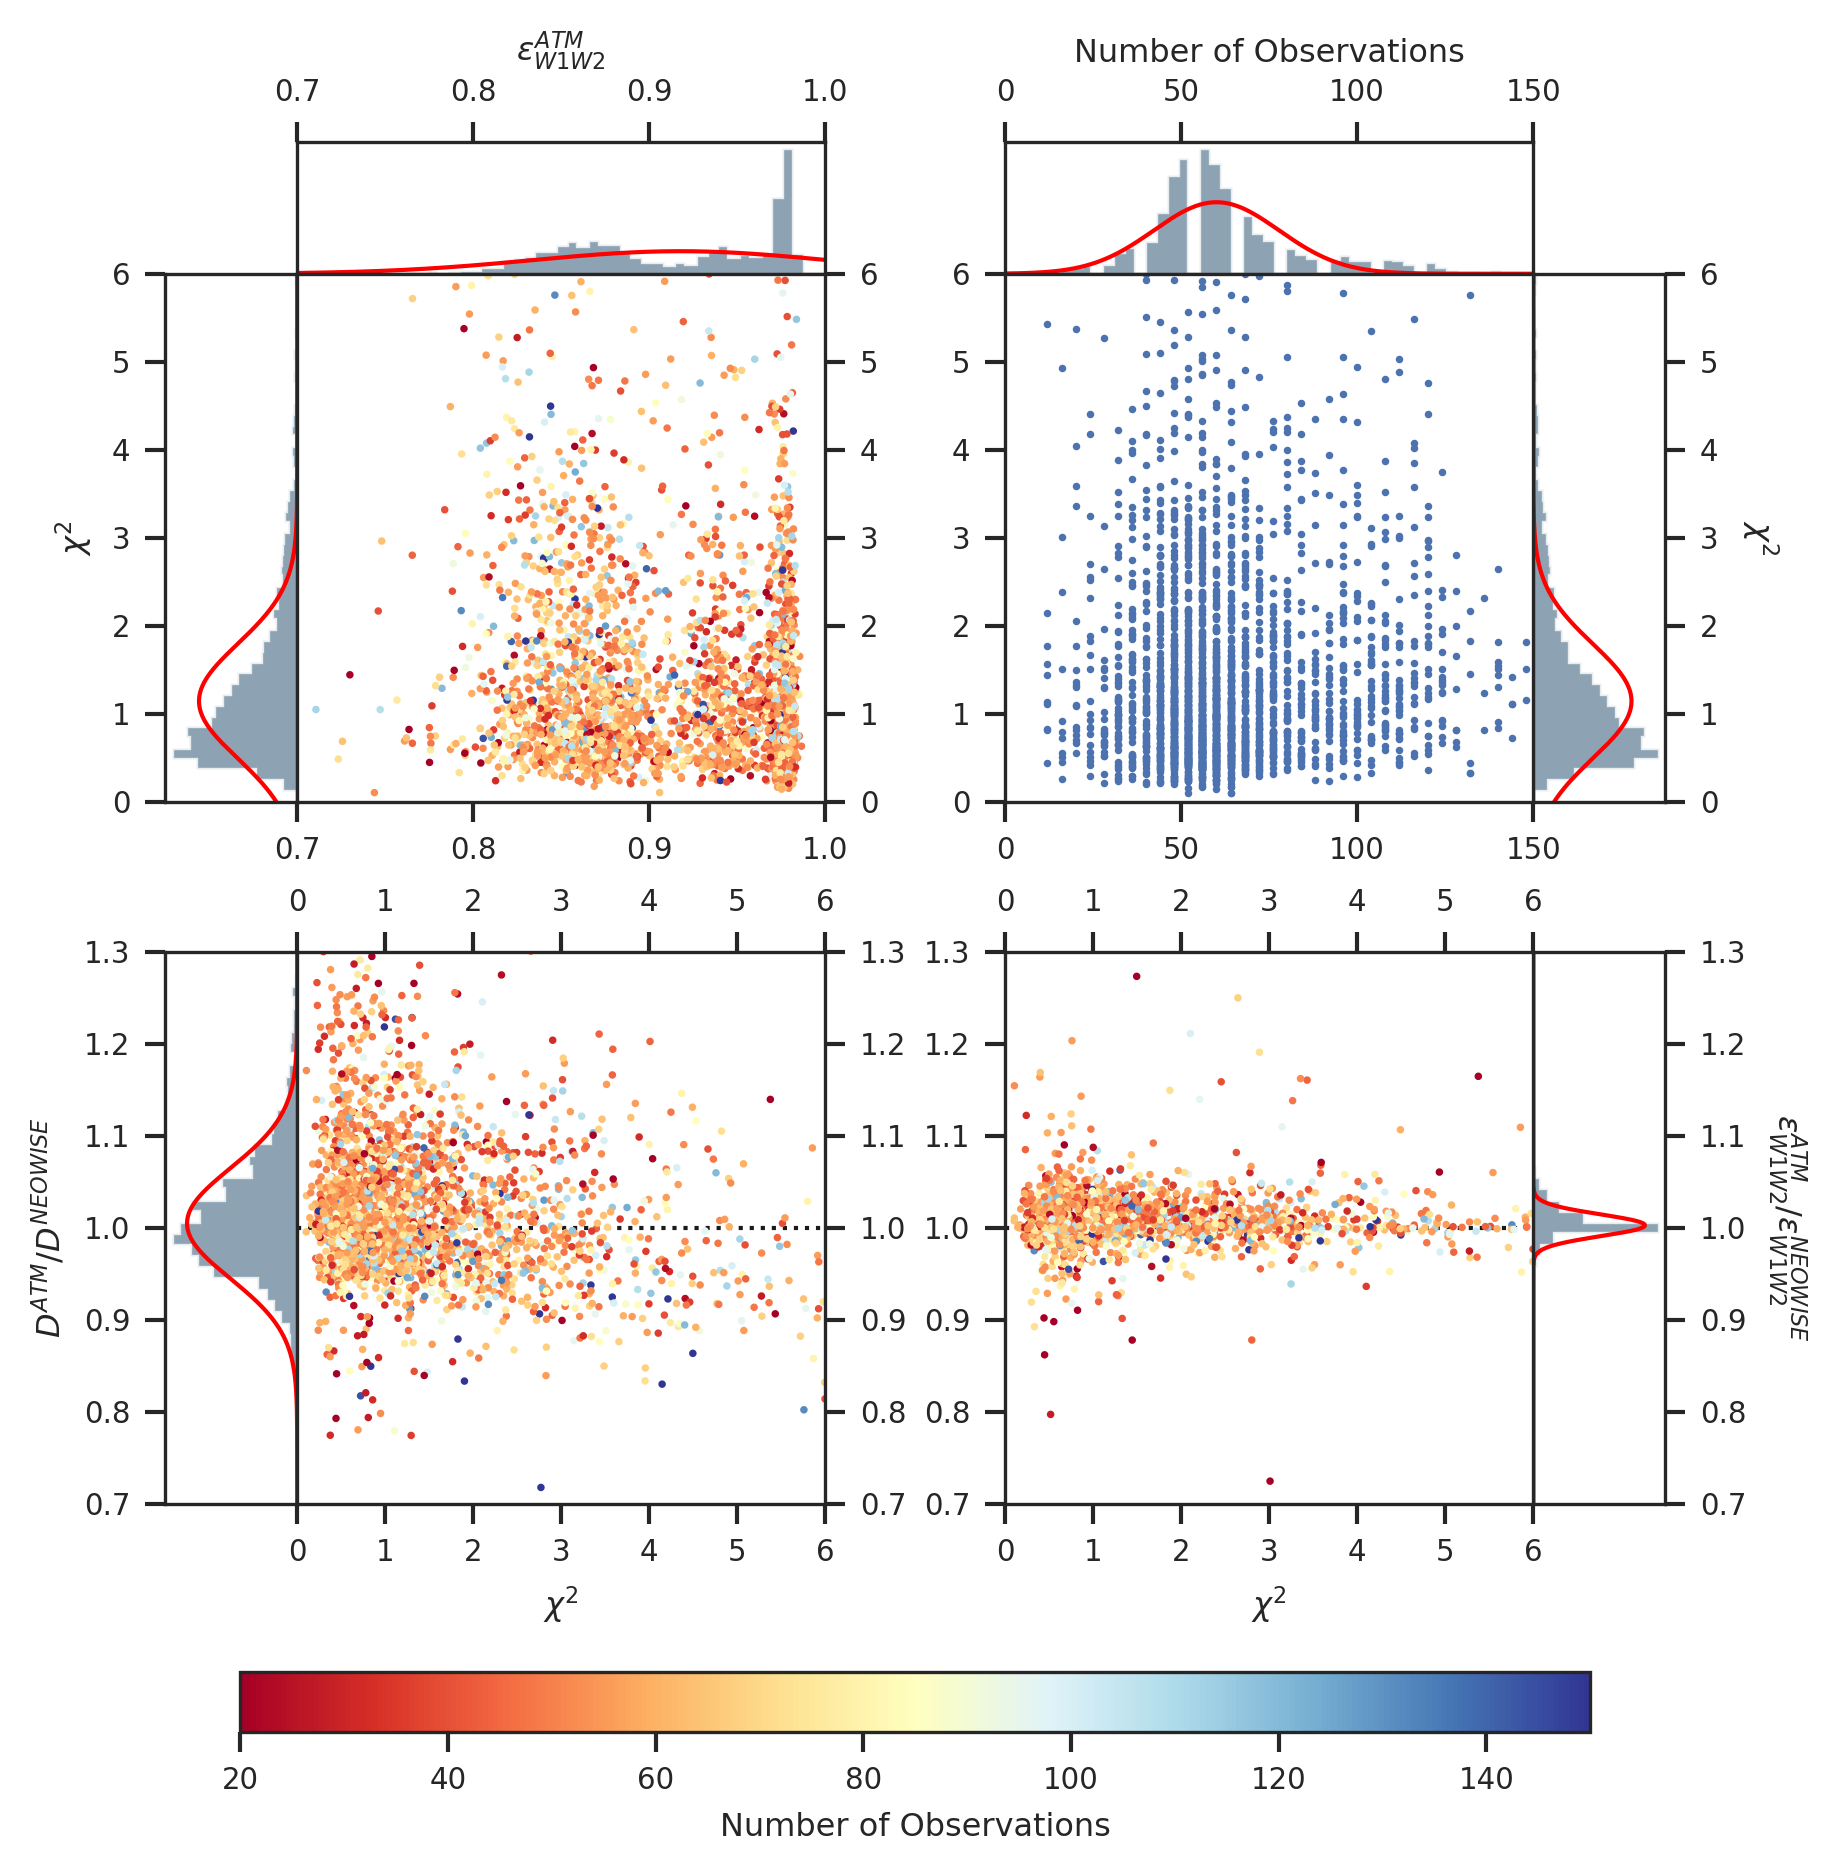

In [17]:
merged_results["eps_W1W2_NEOWISE"] = 1 - merged_results["IR_ALBEDO"] * calcQ(merged_results["SLOPE_PARAM"])

filtered_results = merged_results
print("Filtered results: {}".format(len(filtered_results)))

scatterKwargs = {
    "cmap" : "RdYlBu",
    "vmin" : 20,
    "vmax" : 150,
    "s": 1,
    "c": filtered_results["num_obs"].values
}

histKwargs = {
    "histtype" : "stepfilled",
    "color" : "#718CA1",
    "alpha" : 0.8, 
    "normed" : True,
}

histKwargs_s = {
    "histtype" : "stepfilled",
    "color" : "#718CA1",
    "alpha" : 0.8, 
    "normed" : True,
    "orientation" : "horizontal",
}

plotKwargs = {
    "ls" : "-",
    "lw" : 1,
    "c" : "red",
}

plotKwargsComponents = {
    "ls" : ":",
    "lw" : 1,
    "c" : "red",
    "alpha" : 0.8
}

verticalLines = {
    "lw" : 0.5,
    "linestyle" : ":",
}

fig = plt.figure(dpi=DPI, figsize=(5,5))

### Top left 
gs_lt = gridspec.GridSpec(5,5)
gs_lt.update(left=0.0, right=0.44, top=1.0, bottom=0.56)
gs_lt.update(wspace=0.0, hspace=0.0)
ax1 = fig.add_subplot(gs_lt[0, 1:])
ax2 = fig.add_subplot(gs_lt[1:, 0])
ax3 = fig.add_subplot(gs_lt[1:, 1:], sharex=ax1, sharey=ax2)

cm = ax3.scatter(filtered_results["eps_W1W2_median"].values, 
                 filtered_results["reduced_chi2"].values,
                 **scatterKwargs)
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.set_ylim(0, 6)
ax3.set_xlim(0.70, 1.0)

ax1, stats = plotHist(ax1, 
                      filtered_results["eps_W1W2_median"], 
                      [0.7, 1.0], 
                      numGauss=1, 
                      bins=50,
                      histKwargs=histKwargs,
                      plotKwargs=plotKwargs)
ax1.set_xlabel("$\epsilon_{W1W2}^{ATM}$")
ax1.xaxis.set_label_position("top")
ax1.xaxis.tick_top()
ax1.set_yticks([])

ax2, stats = plotHist(ax2, 
                      filtered_results["reduced_chi2"], 
                      [0.0, 6.0], 
                      numGauss=1, 
                      bins=50,
                      swapAxes=True,
                      useMedian=False,
                      statRange=[0.0,3.0],
                      histKwargs=histKwargs_s,
                      plotKwargs=plotKwargs)
ax2.set_ylabel(r"$\chi^2$")
ax2.invert_xaxis()
ax2.set_xticks([])

### Bottom left
gs_lb = gridspec.GridSpec(5,5)
gs_lb.update(left=0.0, right=0.44, top=0.46, bottom=0.0)
gs_lb.update(wspace=0.0, hspace=0.0)
#ax4 = fig.add_subplot(gs_lb[-1, 1:])
ax5 = fig.add_subplot(gs_lb[:-1, 0])
ax6 = fig.add_subplot(gs_lb[:-1, 1:], sharey=ax5)


cm = ax6.scatter(filtered_results["reduced_chi2"].values, 
                 10**filtered_results["logD_median"].values / (filtered_results["DIAMETER"].values * 1000.), 
                 **scatterKwargs)
ax6.hlines([1], 0, 6, linestyle=":", lw=1, color="k", zorder=0)
ax6.tick_params(labeltop=True, labelbottom=True, 
                top=True, bottom=True, 
                right=True, labelright=True,
                left=False, labelleft=False)
ax6.set_xticks(np.arange(0.0, 7))
ax6.set_xlabel(r"$\chi^2$")
ax6.set_xlim(0, 6)
ax6.set_ylim(0.7, 1.3)

#ax4, stats = plotHist(ax4, 
#                      filtered_results["reduced_chi2"].values, 
#                      [0.0, 6], 
#                      numGauss=1, 
#                      bins=50,
#                      histKwargs=histKwargs,
#                      plotKwargs=plotKwargs)
#ax4.set_xlabel(r"$\chi^2$")
#ax4.invert_yaxis()
#ax4.set_yticks([])
#ax4.set_xticks(np.arange(0.0, 7))

ax5, stats = plotHist(ax5, 
                      10**filtered_results["logD_median"].values / (filtered_results["DIAMETER"].values * 1000.), 
                      [0.7, 1.3], 
                      numGauss=1, 
                      bins=50,
                      swapAxes=True,
                      histKwargs=histKwargs_s,
                      plotKwargs=plotKwargs)
ax5.set_ylabel("$D^{ATM}/D^{NEOWISE}$")
ax5.invert_xaxis()
ax5.set_xticks([])

### Top right
gs_rt = gridspec.GridSpec(5,5)
gs_rt.update(left=0.56, right=1.0, top=1.0, bottom=0.56)
gs_rt.update(wspace=0.0, hspace=0.0)
ax7 = fig.add_subplot(gs_rt[0, :-1])
ax8 = fig.add_subplot(gs_rt[1:, -1])
ax9 = fig.add_subplot(gs_rt[1:, :-1], sharex=ax7, sharey=ax8)

cm = ax9.scatter(filtered_results["num_obs"].values, 
                 filtered_results["reduced_chi2"].values,
                 s=1,
                 c="b")
ax9.set_xlim(0, 150)
ax9.set_ylim(0, 6)

ax7, stats = plotHist(ax7, 
                      filtered_results["num_obs"].values, 
                      [0.0, 150], 
                      numGauss=1, 
                      bins=50,
                      histKwargs=histKwargs,
                      plotKwargs=plotKwargs)
ax7.set_xlabel("Number of Observations")
ax7.xaxis.set_label_position("top")
ax7.xaxis.tick_top()
ax7.set_yticks([])

ax8, stats = plotHist(ax8, 
                      filtered_results["reduced_chi2"].values, 
                      [0.0, 6.0], 
                      numGauss=1, 
                      bins=50,
                      swapAxes=True,
                      useMedian=False,
                      statRange=[0.0,3.0],
                      histKwargs=histKwargs_s,
                      plotKwargs=plotKwargs)
ax8.set_ylabel(r"$\chi^2$", rotation=-90, labelpad=15)
ax8.yaxis.set_label_position("right")
ax8.yaxis.tick_right()
ax8.set_xticks([])



gs_rb = gridspec.GridSpec(5,5)
gs_rb.update(left=0.56, right=1.0, top=0.46, bottom=0.0)
gs_rb.update(wspace=0.0, hspace=0.0)
#ax10 = fig.add_subplot(gs_rb[-1, :-1])
ax11 = fig.add_subplot(gs_rb[:-1, -1])
ax12 = fig.add_subplot(gs_rb[:-1, :-1], sharey=ax11)

cm = ax12.scatter(filtered_results["reduced_chi2"].values, 
                  filtered_results["eps_W1W2_median"].values / (filtered_results["eps_W1W2_NEOWISE"].values), 
                  **scatterKwargs)
ax12.hlines([1], 0, 6, linestyle=":", lw=1, color="k", zorder=0)
ax12.set_xlim(0, 6)
ax12.set_ylim(0.7, 1.3)
ax12.tick_params(labeltop=True, labelbottom=True, top=True, bottom=True)
ax12.set_xticks(np.arange(0.0, 7))
ax12.set_xlabel(r"$\chi^2$")

#ax10, stats = plotHist(ax10, 
#                      filtered_results["reduced_chi2"].values, 
#                      [0.0, 6.0], 
#                      numGauss=1, 
#                      bins=50,
#                      histKwargs=histKwargs,
#                      plotKwargs=plotKwargs)
#ax10.set_xlabel(r"$\chi^2$")
#ax10.invert_yaxis()
#ax10.set_xticks(np.arange(0.0, 7))
#ax10.set_yticks([])

ax11, stats = plotHist(ax11, 
                      filtered_results["eps_W1W2_median"].values / (filtered_results["eps_W1W2_NEOWISE"].values), 
                      [0.7, 1.3], 
                      numGauss=1, 
                      bins=50,
                      swapAxes=True,
                      histKwargs=histKwargs_s,
                      plotKwargs=plotKwargs)
ax11.set_ylabel("$\epsilon_{W1W2}^{ATM}/\epsilon_{W1W2}^{NEOWISE}$", rotation=-90, labelpad=15)
ax11.yaxis.set_label_position("right")
ax11.yaxis.tick_right()
ax11.set_xticks([])

cbar_ax = fig.add_axes([0.05, -0.06, 0.90, 0.04])
fig.colorbar(cm, 
             cax=cbar_ax, 
             label=r"Number of Observations", 
             orientation="horizontal")
if SAVE_FIGS is True:
    fig.savefig(os.path.join(SAVE_DIR, "chi2_num_obs_hists_all.{}".format(FORMAT)),
            bbox_inches='tight')

In [18]:
# Full sample
model_stats["reduced_chi2"].mean()

3.020015310368436

In [19]:
# DVBI matched
filtered_results["reduced_chi2"].mean()

1.5898345231634237

Filtered results: 2727
14 values are outside the defined minimum and maximum.
17 values are outside the defined minimum and maximum.
16 values are outside the defined minimum and maximum.


/epyc/projects/atm/atm/atm/plotting/histograms.py:46: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(xValues, bins=np.linspace(xRange[0], xRange[1], bins), **histKwargs)
/epyc/projects/atm/atm/atm/plotting/histograms.py:46: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(xValues, bins=np.linspace(xRange[0], xRange[1], bins), **histKwargs)
/epyc/projects/atm/atm/atm/plotting/histograms.py:46: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(xValues, bins=np.linspace(xRange[0], xRange[1], bins), **histKwargs)
/epyc/projects/atm/envs/atm_py36/lib/python3.6/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, t

mu : 0.977
sigma : 0.004
weight : 0.300

mu : 0.862
sigma : 0.032
weight : 0.510

mu : 0.945
sigma : 0.014
weight : 0.189

22 values are outside the defined minimum and maximum.
mu : 0.061
sigma : 0.010
weight : 0.297

mu : 0.359
sigma : 0.079
weight : 0.505

mu : 0.142
sigma : 0.039
weight : 0.199



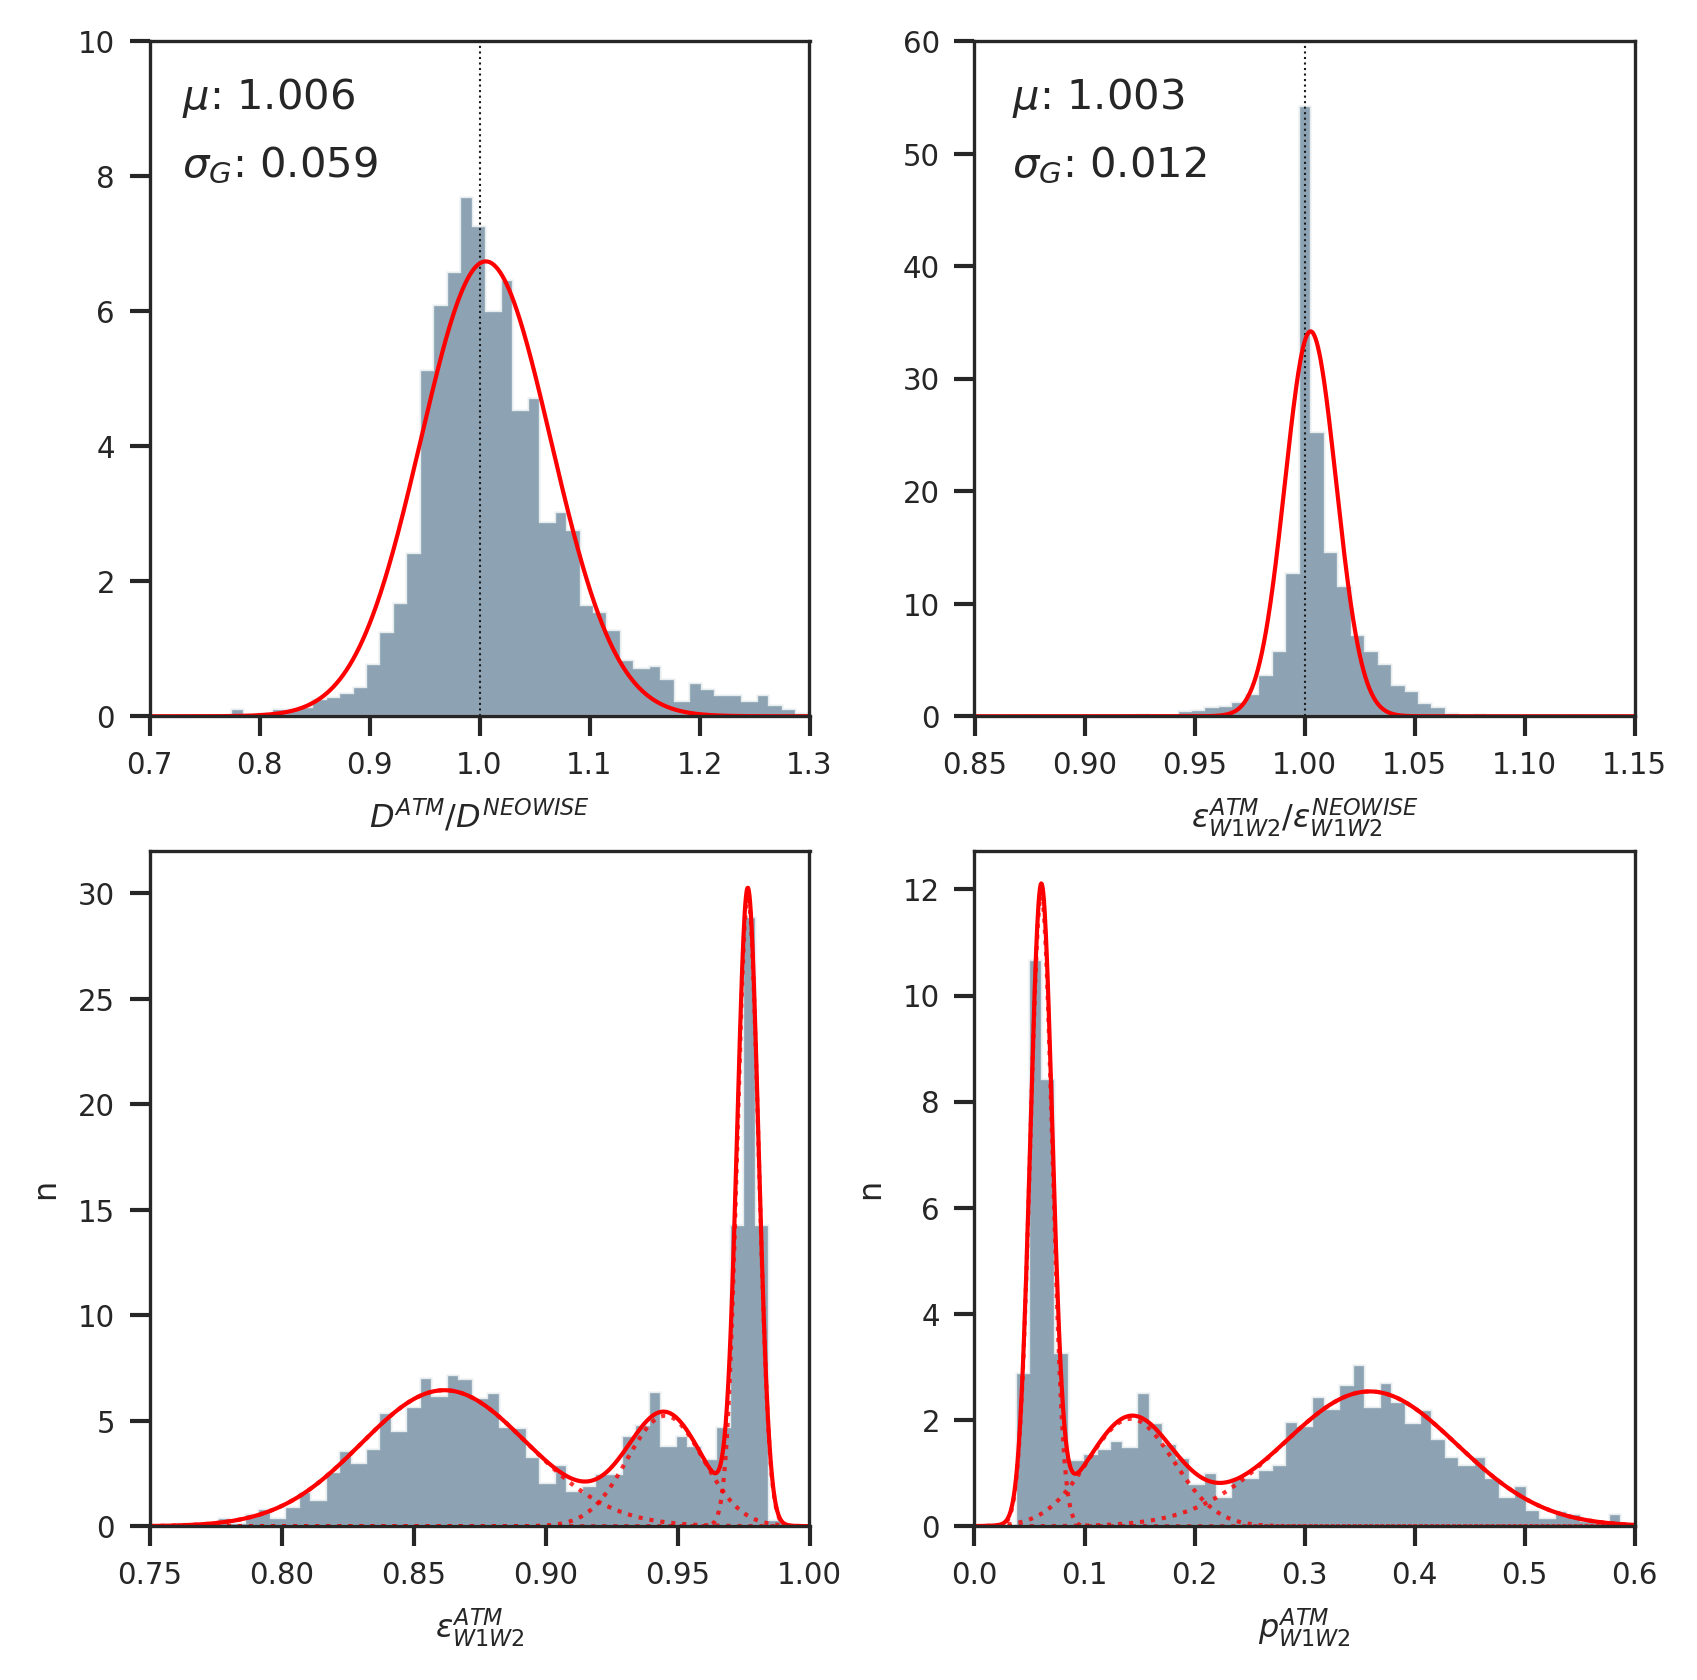

In [20]:
merged_results["eps_W1W2_NEOWISE"] = 1 - merged_results["IR_ALBEDO"] * calcQ(merged_results["SLOPE_PARAM"])
merged_results["p_W1W2_median"] = (1 - merged_results["eps_W1W2_median"]) / calcQ(merged_results["G_median"])

filtered_results = merged_results[(merged_results["num_obs"] >= 16)
                                  & (merged_results["reduced_chi2"] < 6)]
print("Filtered results: {}".format(len(filtered_results)))

histKwargs = {
    "histtype" : "stepfilled",
    "color" : "#718CA1",
    "alpha" : 0.8, 
    "normed" : True,
}
plotKwargs = {
    "ls" : "-",
    "lw" : 1,
    "c" : "red"
}

plotKwargsComponents = {
    "ls" : ":",
    "lw" : 1,
    "c" : "red",
    "alpha" : 0.8
}

verticalLines = {
    "lw" : 0.5,
    "linestyle" : ":",
}

fig, ax = plt.subplots(2, 2, dpi=DPI, figsize=(5.5, 5.5))
fig.subplots_adjust(
        # the left side of the subplots of the figure
        left=0.05,  
        # the right side of the subplots of the figure
        right=0.95,
        # the bottom of the subplots of the figure
        bottom=0.05,
        # the top of the subplots of the figure
        top=0.95,
        # the amount of width reserved for space between subplots,
        # expressed as a fraction of the average axis width
        wspace=0.25,   
        # the amount of height reserved for space between subplots,
        # expressed as a fraction of the average axis height
        hspace=0.2)   
ax[0,0], stats = plotHist(ax[0,0], 
                         10**filtered_results["logD_median"].values / (filtered_results["DIAMETER"].values * 1000.), 
                         [0.7, 1.3], 
                         numGauss=1, 
                         bins=50,
                         histKwargs=histKwargs,
                         plotKwargs=plotKwargs)
ax[0,0].vlines([1.0], 0, 10, **verticalLines)
ax[0,0].set_xlabel(r"$D^{ATM} / D^{NEOWISE}$")
ax[0,0].set_xlim(0.7, 1.3)
ax[0,0].set_ylim(0, 10)
ax[0,0].text(0.73, 9.0, r"$\mu$: {:.3f}".format(stats[0]))
ax[0,0].text(0.73, 8.0, r"$\sigma_G$: {:.3f}".format(stats[1]))


ax[0,1], stats = plotHist(ax[0,1], 
                         filtered_results["eps_W1W2_median"].values / filtered_results["eps_W1W2_NEOWISE"].values, 
                         [0.85, 1.15], 
                         numGauss=1, 
                         bins=50,
                         histKwargs=histKwargs,
                         plotKwargs=plotKwargs)
ax[0,1].vlines([1.0], 0, 60, **verticalLines)
ax[0,1].set_xlabel(r"$\epsilon^{ATM}_{W1W2} / \epsilon^{NEOWISE}_{W1W2}$")
ax[0,1].set_xlim(0.85, 1.15)
ax[0,1].set_ylim(0, 60)
ax[0,1].text(0.867, 54, r"$\mu$: {:.3f}".format(stats[0]))
ax[0,1].text(0.867, 48, r"$\sigma_G$: {:.3f}".format(stats[1]))

ax[1,0], stats = plotHist(ax[1,0], 
                          filtered_results["eps_W1W2_median"].values, 
                          [0.75, 1], 
                          numGauss=3, 
                          bins=50,
                          histKwargs=histKwargs,
                          plotKwargs=plotKwargs,
                          plotKwargsComponents=plotKwargsComponents)
ax[1,0].set_xlabel("$\epsilon^{ATM}_{W1W2}$")
ax[1,0].set_ylabel("n")
ax[1,0].set_ylim(0, 32)
ax[1,0].set_xlim(0.75, 1.0)
for gauss in stats:
    print("mu : {:.3f}".format(gauss[0]))
    print("sigma : {:.3f}".format(gauss[1]))
    print("weight : {:.3f}".format(gauss[2]))
    print("")
    
ax[1,1], stats = plotHist(ax[1,1], 
                          filtered_results["p_W1W2_median"].values, 
                          [0, 0.6], 
                          numGauss=3,
                          bins=50,
                          histKwargs=histKwargs,
                          plotKwargs=plotKwargs,
                          plotKwargsComponents=plotKwargsComponents)
ax[1,1].set_xlabel("$p^{ATM}_{W1W2}$")
ax[1,1].set_ylabel("n")#
ax[1,1].set_xlim(0.0, 0.6)
for gauss in stats:
    print("mu : {:.3f}".format(gauss[0]))
    print("sigma : {:.3f}".format(gauss[1]))
    print("weight : {:.3f}".format(gauss[2]))
    print("")

if SAVE_FIGS is True:
    fig.savefig(os.path.join(SAVE_DIR, "diameter_emissivity_albedo.{}".format(FORMAT)),
                bbox_inches='tight')

In [21]:
model = NEATM(verbose=False)
obs = WISE()

D = 10000.
G = 0.15
alpha_rad = pp_dfs[0]["alpha_rad"].median()
r = np.linspace(1.5, 5.5, 46)

track_dict = {
    "track1a" : {
        "T1" : 406,
        "eps_W1" : 0.977,  
        "eps_W2" : 0.977, 
        "eps_W3" : 0.80,
        "eps_W4" : 0.98,
    },
    
    "track1b" : {
        "T1" : 406,
        "eps_W1" : 0.977,  
        "eps_W2" : 0.977, 
        "eps_W3" : 0.90,
        "eps_W4" : 0.90,
    },
    
    "track2a" : {
        "T1" : 399,
        "eps_W1" : 0.946,  
        "eps_W2" : 0.946, 
        "eps_W3" : 0.80,
        "eps_W4" : 0.98,
    },
    
    "track2b" : {
        "T1" : 399,
        "eps_W1" : 0.946,  
        "eps_W2" : 0.946, 
        "eps_W3" : 0.90,
        "eps_W4" : 0.90,
    },
    
    "track3a" : {
        "T1" : 391,
        "eps_W1" : 0.863,  
        "eps_W2" : 0.863, 
        "eps_W3" : 0.80,
        "eps_W4" : 0.98,
    },
    
    "track3b" : {
        "T1" : 391,
        "eps_W1" : 0.863,  
        "eps_W2" : 0.863, 
        "eps_W3" : 0.90,
        "eps_W4" : 0.90,
    },  
}

lambd = obs.filterEffectiveLambdas
num_lambds = len(lambd)

track_df = []
for track in track_dict.keys():
    for r_i in r:
        # Make array of assumed emissivities
        eps = np.array([
            track_dict[track]["eps_W1"], 
            track_dict[track]["eps_W2"], 
            track_dict[track]["eps_W3"], 
            track_dict[track]["eps_W4"]
        ])
        # Calculate albedo
        albedo = (1 - eps) / calcQ(G)
        
        # Calculate flux at 4 WISE bands
        flux = calcFluxLambdaAtObsWithSunlight(
            model, 
            r_i * np.ones(num_lambds),
            (r_i - 1) * np.ones(num_lambds),
            lambd,
            track_dict[track]["T1"] / np.sqrt(r_i) * np.ones(num_lambds),
            D * np.ones(num_lambds),
            alpha_rad * np.ones(num_lambds),
            eps,
            albedo,
            G * np.ones(num_lambds))

        # Convert to magnitudes and add to a DataFrame
        mag = obs.convertFluxLambdaToMag(flux.T)
        track_df.append(pd.DataFrame({
            "track" : [track],
            "r_au" : [r_i],
            "mag_W1" : [mag[0]],
            "mag_W2" : [mag[1]],
            "mag_W3" : [mag[2]],
            "mag_W4" : [mag[3]]}))

tracks = pd.concat(track_df)
tracks.reset_index(inplace=True, drop=True)
tracks["obs_id"] = np.arange(1, len(tracks) + 1)

# Calculate colors
colors = calcColors(obs, tracks)
tracks = tracks.merge(colors, on="obs_id")

Calculating colors using these columns:
Magnitudes : mag_W1, mag_W2, mag_W3, mag_W4
Creating colors: W1-W2, W2-W3, W3-W4
Done.



In [22]:
def _plotTracks(ax, xCol, yCol):
    ax.plot(tracks[tracks["track"] == "track1a"][xCol].values,
            tracks[tracks["track"] == "track1a"][yCol].values,
            c="k")
    ax.plot(tracks[tracks["track"] == "track1b"][xCol].values,
            tracks[tracks["track"] == "track1b"][yCol].values,
            c="k",
            ls="--")
    ax.plot(tracks[tracks["track"] == "track2a"][xCol].values,
            tracks[tracks["track"] == "track2a"][yCol].values,
            c="r")
    ax.plot(tracks[tracks["track"] == "track2b"][xCol].values,
            tracks[tracks["track"] == "track2b"][yCol].values,
            c="r",
            ls="--")
    ax.plot(tracks[tracks["track"] == "track3a"][xCol].values,
            tracks[tracks["track"] == "track3a"][yCol].values,
            c="#001c7f")
    ax.plot(tracks[tracks["track"] == "track3b"][xCol].values,
            tracks[tracks["track"] == "track3b"][yCol].values,
            c="#001c7f",
            ls="--")

Filtered results: 2432


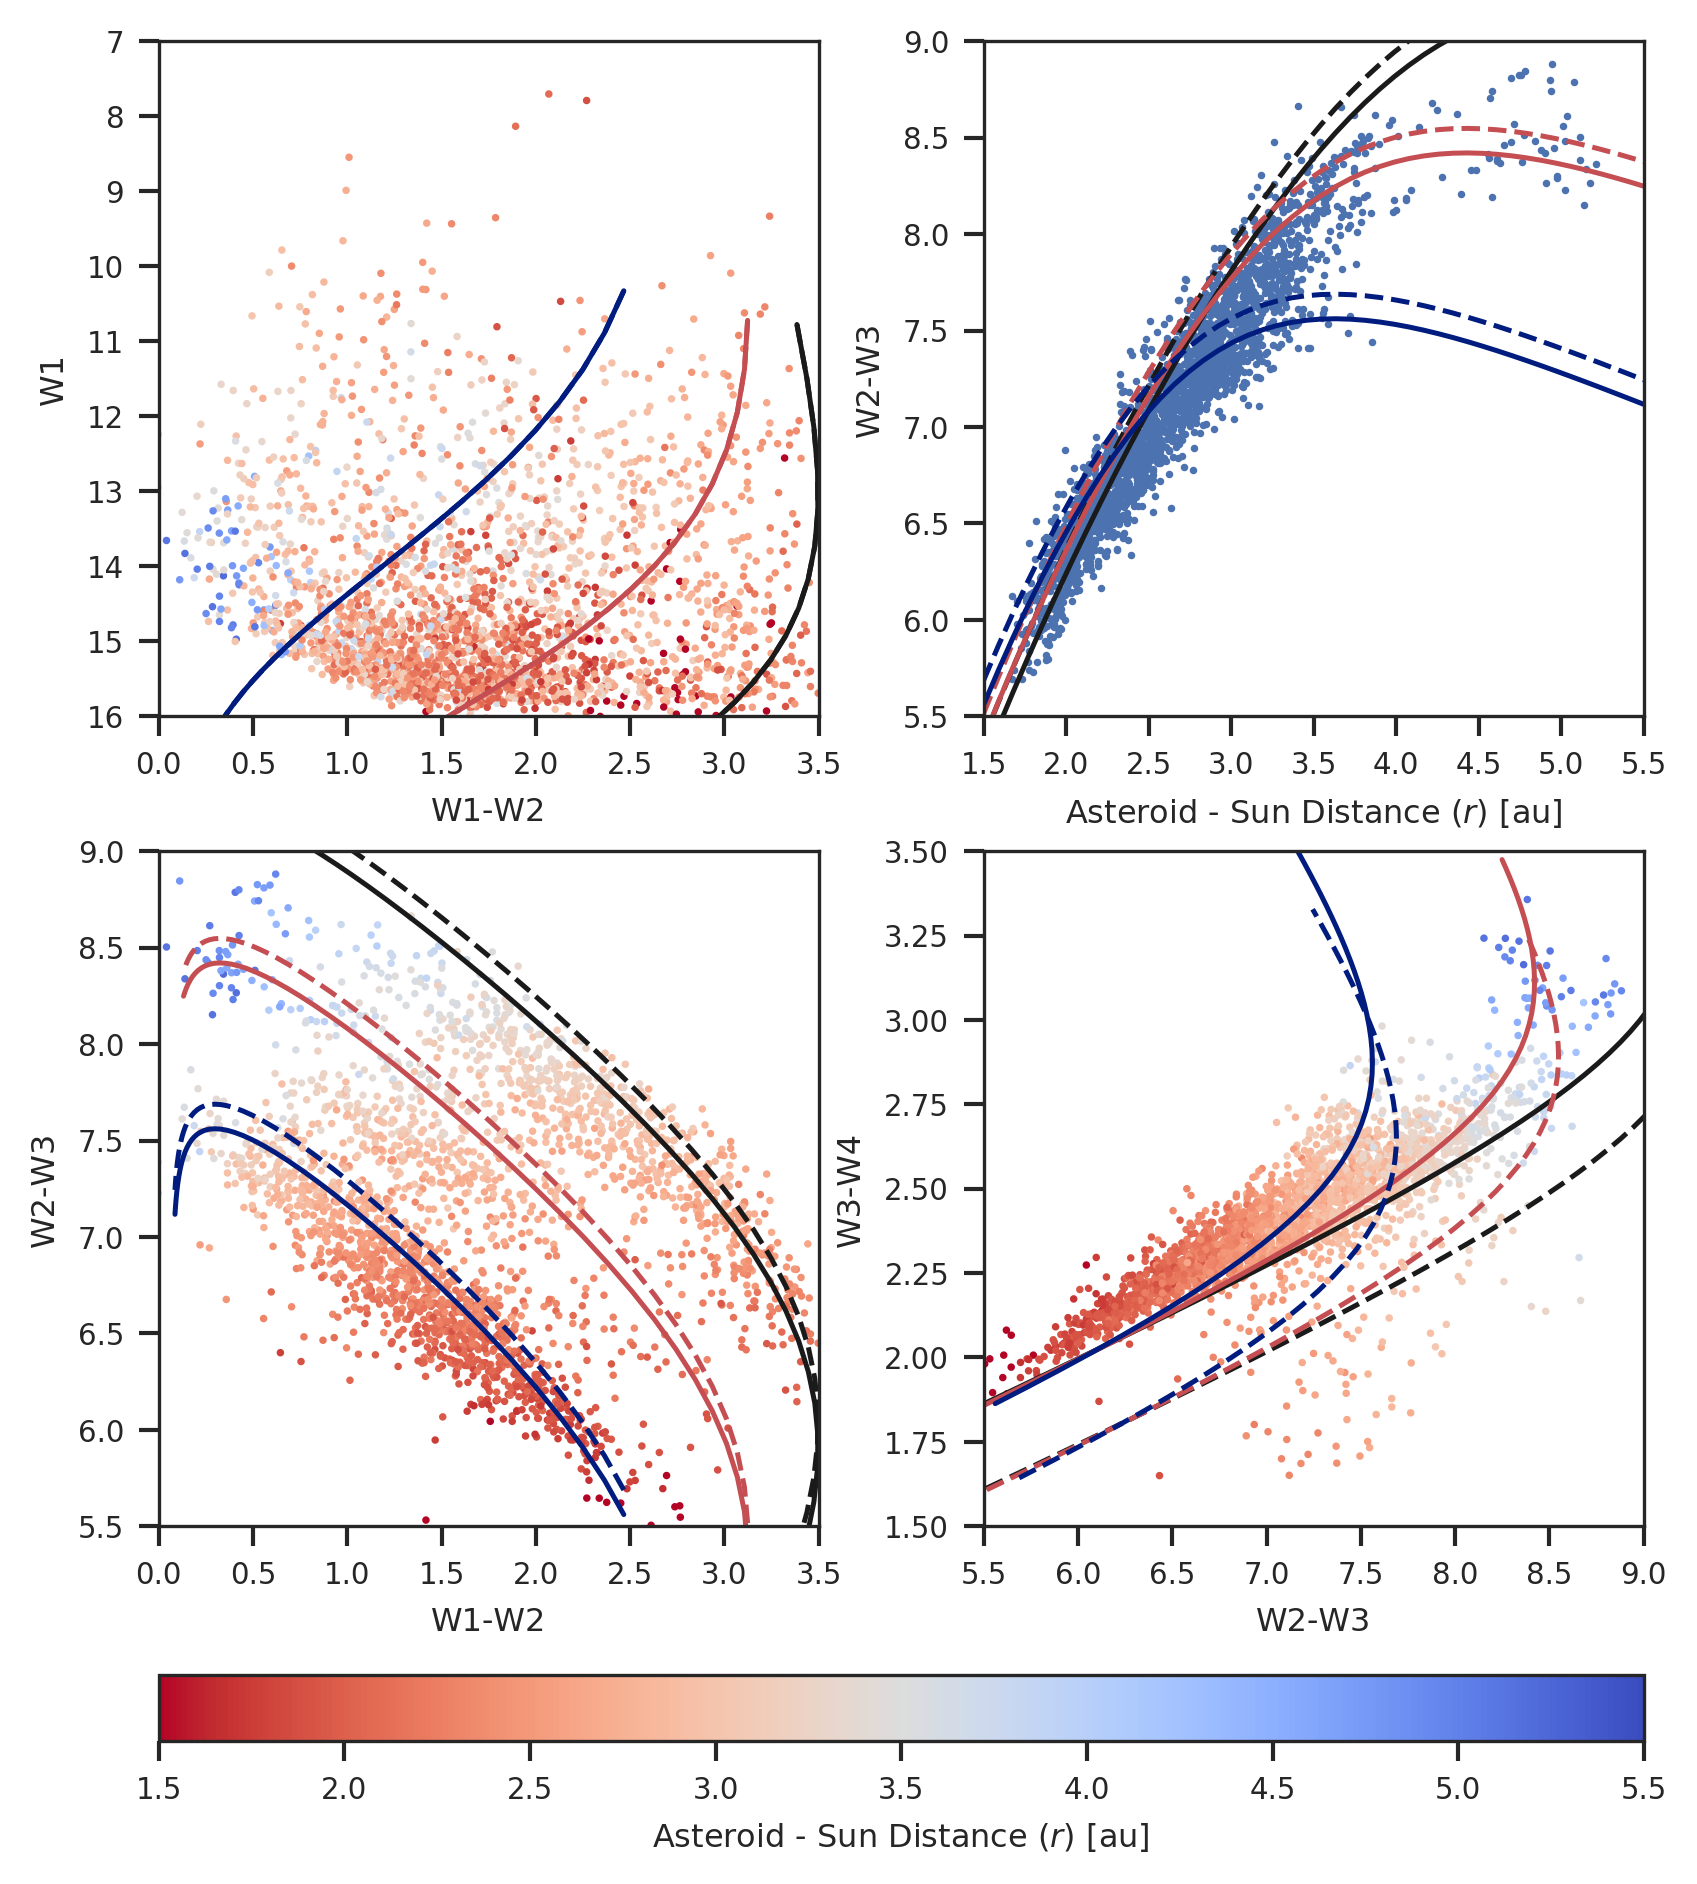

In [23]:
filtered_results = merged_results[(merged_results["num_obs"] >= 28)
                                  & (merged_results["reduced_chi2"] < 3)]
print("Filtered results: {}".format(len(filtered_results)))

scatterKwargs = {
    "cmap" : "coolwarm_r",
    "vmin" : 1.5,
    "vmax" : 5.5,
    "s": 1,
    "c": filtered_results["r_au_median"].values
}

fig, ax = plt.subplots(2, 2, dpi=DPI, figsize=(5.5, 5.5))
fig.subplots_adjust(
        # the left side of the subplots of the figure
        left=0.05,  
        # the right side of the subplots of the figure
        right=0.95,
        # the bottom of the subplots of the figure
        bottom=0.05,
        # the top of the subplots of the figure
        top=0.95,
        # the amount of width reserved for space between subplots,
        # expressed as a fraction of the average axis width
        wspace=0.25,   
        # the amount of height reserved for space between subplots,
        # expressed as a fraction of the average axis height
        hspace=0.2)   
cm = ax[0,0].scatter(filtered_results["W1-W2_median"].values, 
                     filtered_results["mag_W1_median"].values,
                     **scatterKwargs)
_plotTracks(ax[0,0], "W1-W2", "mag_W1")
ax[0,0].set_xlabel("W1-W2")
ax[0,0].set_ylabel("W1")
ax[0,0].set_xlim(0, 3.5)
ax[0,0].set_ylim(7, 16)
ax[0,0].invert_yaxis()

cm = ax[0,1].scatter(filtered_results["r_au_median"].values, 
                     filtered_results["W2-W3_median"].values, 
                     s=1, 
                     c="b")
_plotTracks(ax[0,1], "r_au", "W2-W3")
ax[0,1].set_xlabel(r"Asteroid - Sun Distance ($r$) [au]")
ax[0,1].set_ylabel("W2-W3")
ax[0,1].set_xlim(1.5, 5.5)
ax[0,1].set_ylim(5.5, 9.0)
ax[0,1].set_xticks(np.arange(1.5, 6.0, 0.5))

cm = ax[1,0].scatter(filtered_results["W1-W2_median"].values, 
                     filtered_results["W2-W3_median"].values, 
                     **scatterKwargs)
_plotTracks(ax[1,0], "W1-W2", "W2-W3")
ax[1,0].set_xlabel("W1-W2")
ax[1,0].set_ylabel("W2-W3")
ax[1,0].set_xlim(0, 3.5)
ax[1,0].set_ylim(5.5, 9.0)

cm = ax[1,1].scatter(filtered_results["W2-W3_median"].values, 
                     filtered_results["W3-W4_median"].values, 
                     **scatterKwargs)
_plotTracks(ax[1,1], "W2-W3", "W3-W4")
ax[1,1].set_xlabel("W2-W3")
ax[1,1].set_ylabel("W3-W4")
ax[1,1].set_xlim(5.5, 9.0)
ax[1,1].set_ylim(1.5, 3.5)

cbar_ax = fig.add_axes([0.05, -0.08, 0.90, 0.04])
fig.colorbar(cm, 
             cax=cbar_ax, 
             label=r"Asteroid - Sun Distance ($r$) [au]", 
             orientation="horizontal")
if SAVE_FIGS is True:
    fig.savefig(os.path.join(SAVE_DIR, "CCD_tracks.{}".format(FORMAT)),
            bbox_inches='tight')